In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
# this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/amazon.csv")

In [ ]:


pd.set_option('display.max_columns', None)



In [ ]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [ ]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 1465, and columns are 16.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [ ]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,2
about_product,0
user_id,0


In [ ]:
# Changing the data type of discounted price and actual price

df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')

# Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')

df['discount_percentage'] = df['discount_percentage'] / 100

# Finding unusual string in rating column
df['rating'].value_counts()



,count
rating,
4.1,244
4.3,230
4.2,228
4.0,129
3.9,123
4.4,123
3.8,86
4.5,75
4,52


In [ ]:
# Check the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [ ]:
# Changing Rating Columns Data Type

df['rating'] = df['rating'].str.replace('|', '3.9').astype('float64')

# Changing 'rating_count' Column Data Type

df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [ ]:
df.describe()

,discounted_price,actual_price,discount_percentage,rating,rating_count
count,1465.000000,1465.000000,1465.000000,1465.000000,1463.000000
mean,3125.310874,5444.990635,0.476915,4.096451,18295.541353
std,6944.304394,10874.826864,0.216359,0.291620,42753.864952
min,39.000000,39.000000,0.000000,2.000000,2.000000
25%,325.000000,800.000000,0.320000,4.000000,1186.000000
50%,799.000000,1650.000000,0.500000,4.100000,5179.000000
75%,1999.000000,4295.000000,0.630000,4.300000,17336.500000
max,77990.000000,139900.000000,0.940000,5.000000,426973.000000


In [ ]:


df.isnull().sum().sort_values(ascending = False)



,0
rating_count,2
product_id,0
category,0
product_name,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
about_product,0
user_id,0


In [ ]:
# Find missing values percentage in the data
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

,0
rating_count,0.14
product_id,0.00
category,0.00
product_name,0.00
discounted_price,0.00
actual_price,0.00
discount_percentage,0.00
rating,0.00
about_product,0.00
user_id,0.00


In [ ]:
# Find total number of missing values
df.isnull().sum().sum()

np.int64(2)

<Axes: >

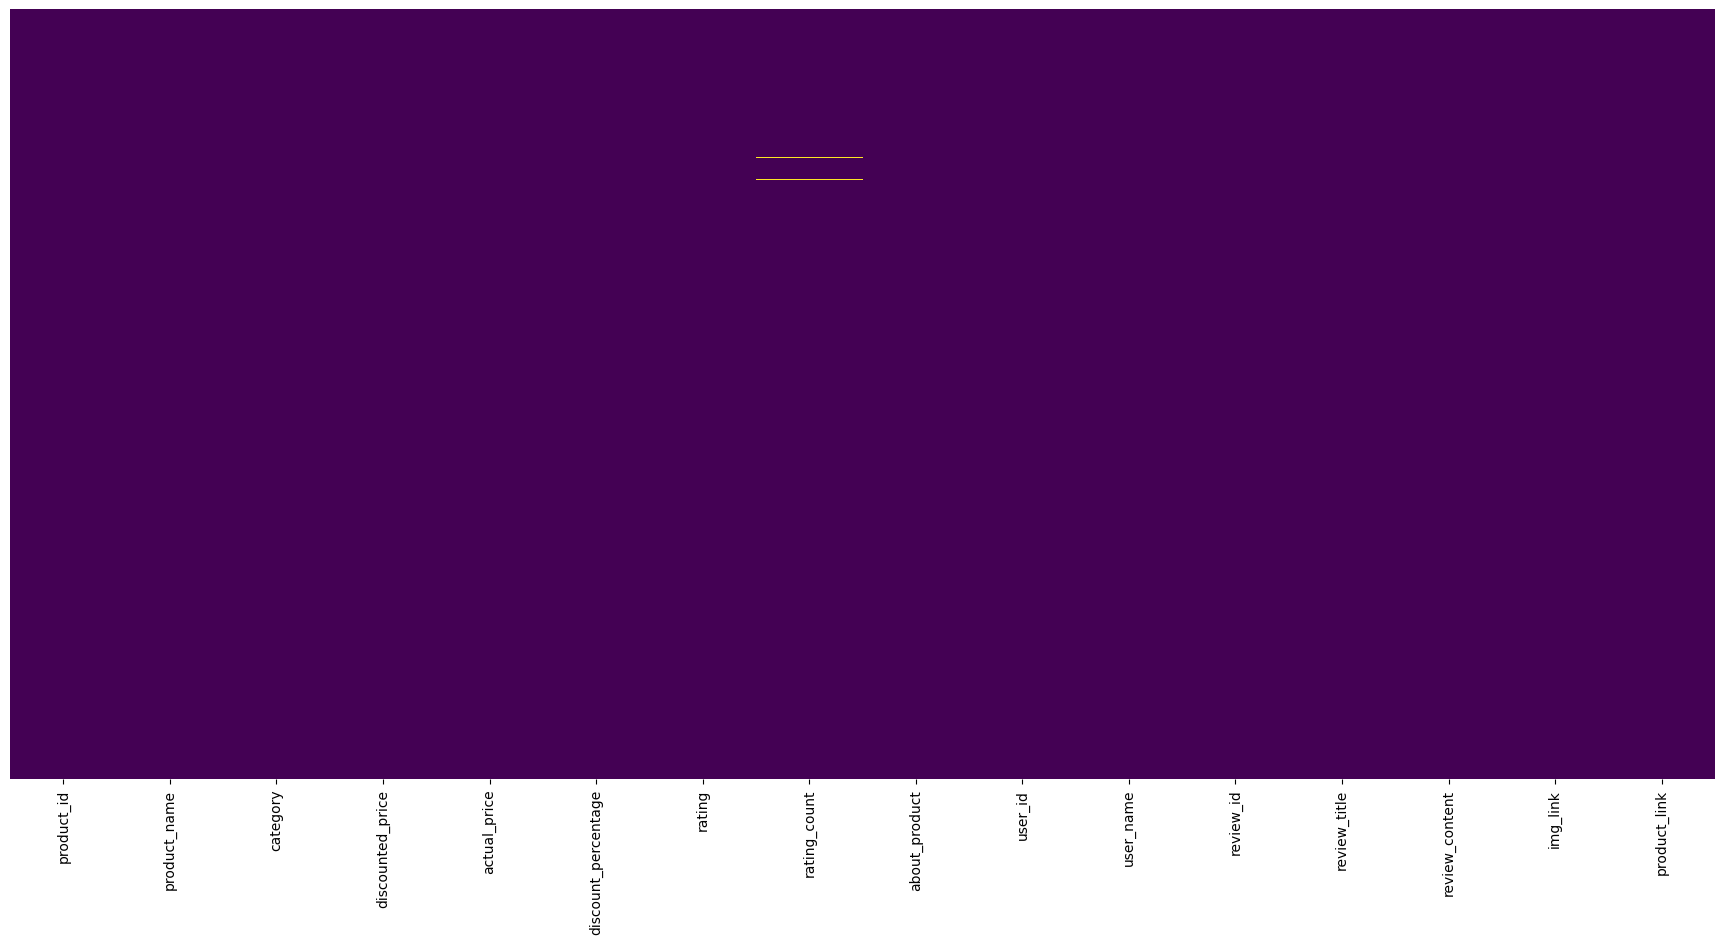

In [ ]:
# make a figure size
plt.figure(figsize=(22, 10))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

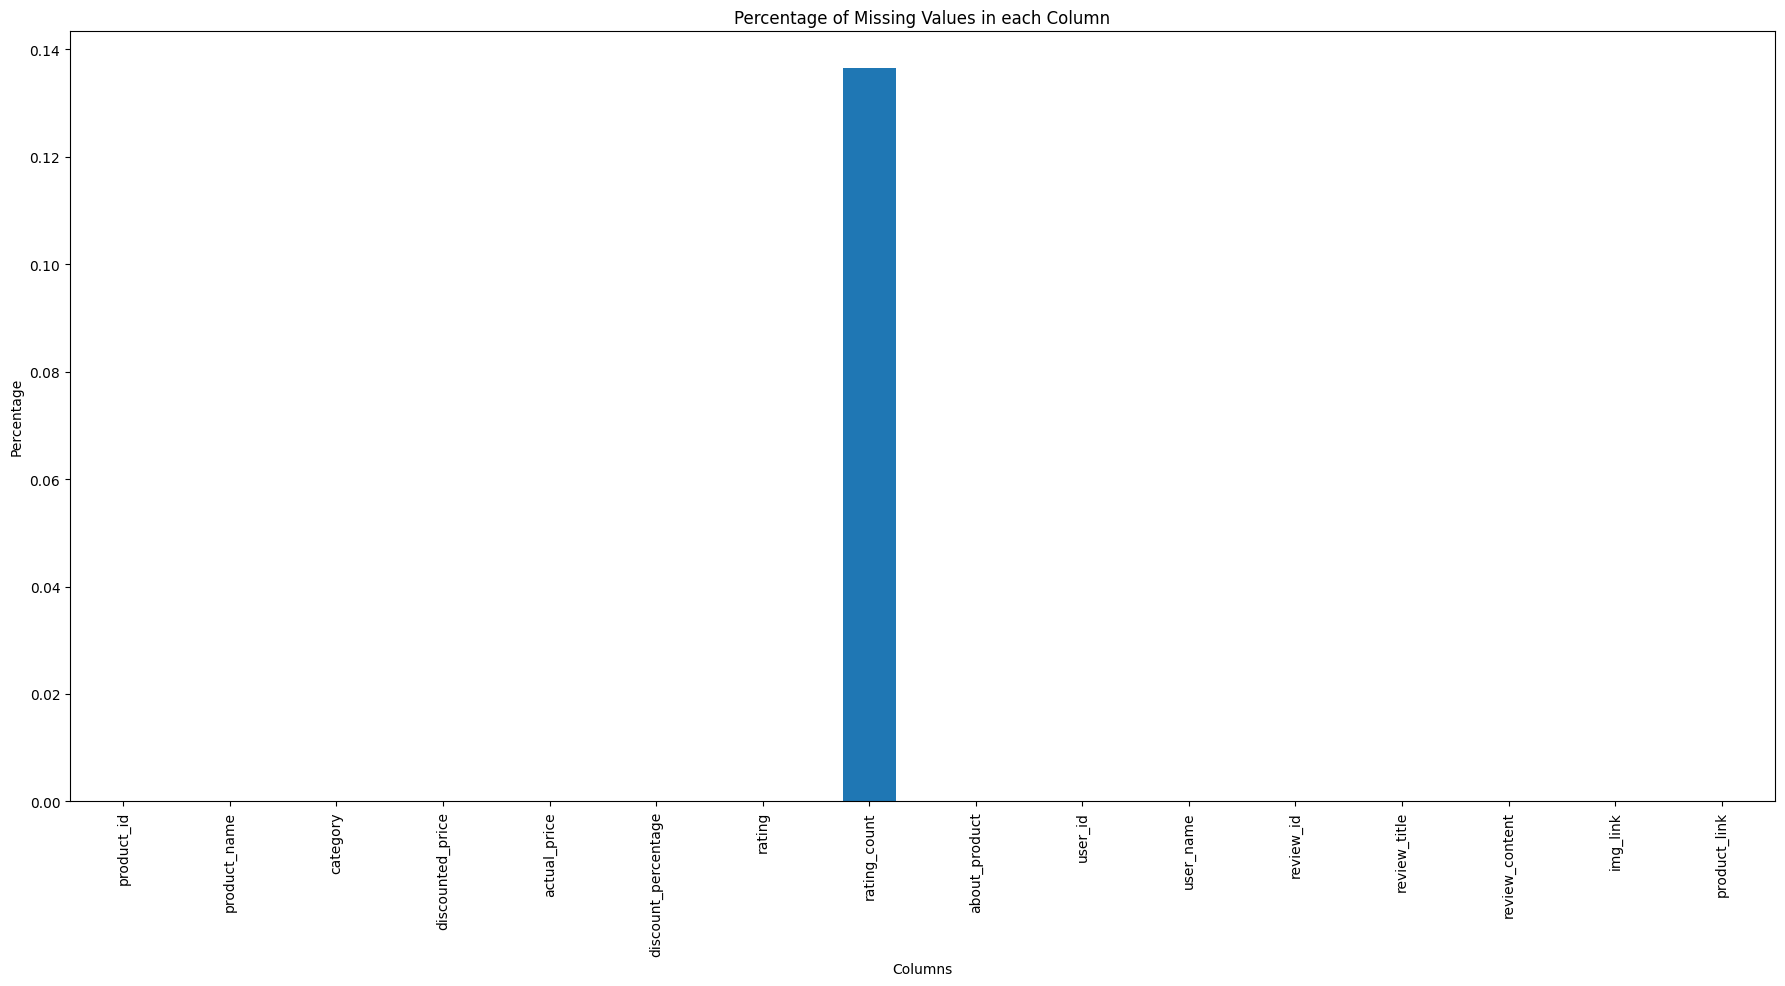

In [ ]:
# make figure size
plt.figure(figsize=(22, 10))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [ ]:
df[df['rating_count'].isnull()].head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,0.80,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,249.0,999.0,0.75,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [ ]:
# Impute missing values
df['rating_count'] = df.rating_count.fillna(value=df['rating_count'].median())

df.isnull().sum().sort_values(ascending = False)



,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


In [ ]:
# Find Duplicate
df.duplicated().any()

False

df.columns



Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

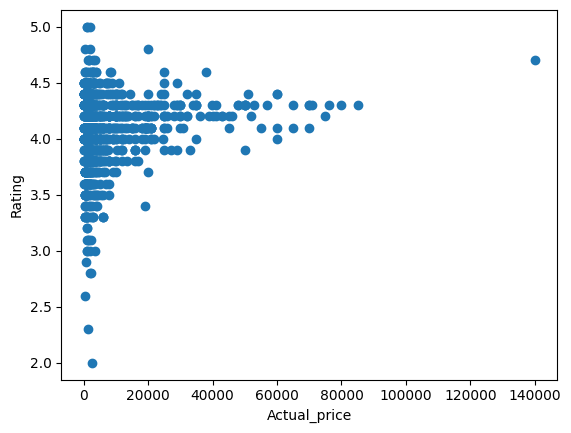

In [ ]:
# Plot actual_price vs. rating
plt.scatter(df['actual_price'], df['rating'])
plt.xlabel('Actual_price')
plt.ylabel('Rating')
plt.show()

In [ ]:
# dont show warnings
import warnings
warnings.filterwarnings('ignore')

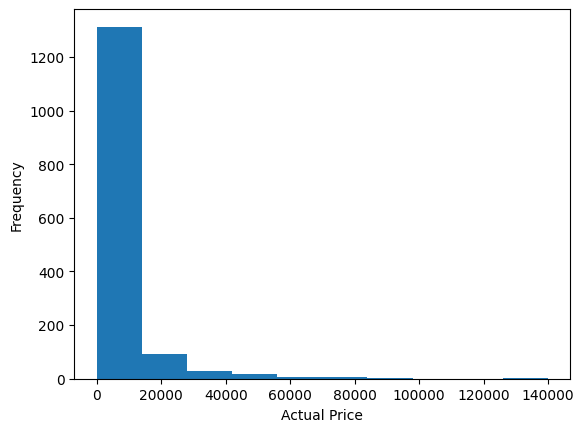

In [ ]:
# Plot distribution of actual_price
plt.hist(df['actual_price'])
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# label encode categorical variables

le_product_id = LabelEncoder()
le_category = LabelEncoder()
le_review_id = LabelEncoder()
le_review_content = LabelEncoder()
le_product_name = LabelEncoder()
le_user_name = LabelEncoder()
le_about_product = LabelEncoder()
le_user_id = LabelEncoder()
le_review_title = LabelEncoder()
le_img_link = LabelEncoder()
le_product_link = LabelEncoder()


df['product_id'] = le_product_id.fit_transform(df['product_id'])
df['category'] = le_category.fit_transform(df['category'])
df['review_id'] = le_review_id.fit_transform(df['review_id'])
df['review_content'] = le_review_content.fit_transform(df['review_content'])
df['product_name'] = le_product_name.fit_transform(df['product_name'])
df['user_name'] = le_user_name.fit_transform(df['user_name'])
df['about_product'] = le_about_product.fit_transform(df['about_product'])
df['user_id'] = le_user_id.fit_transform(df['user_id'])
df['review_title'] = le_review_title.fit_transform(df['review_title'])
df['img_link'] = le_img_link.fit_transform(df['img_link'])
df['product_link'] = le_product_link.fit_transform(df['product_link'])

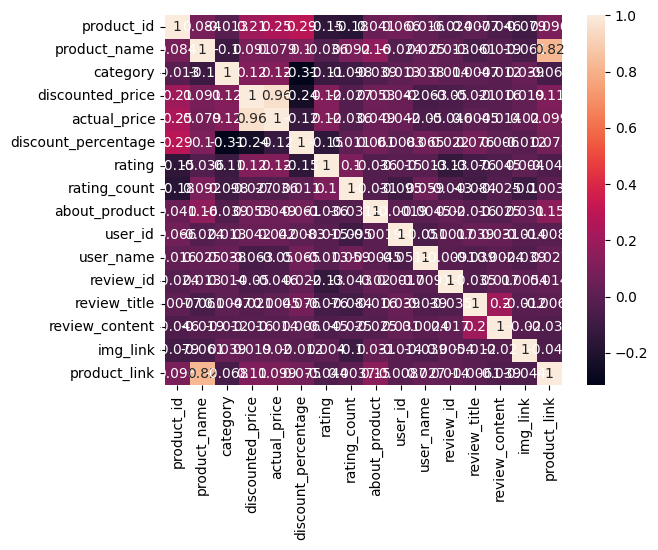

In [ ]:
# Plot correlations between variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.084089 -0.012565          0.206448   
product_name           0.084089      1.000000 -0.103778          0.090665   
category              -0.012565     -0.103778  1.000000          0.119365   
discounted_price       0.206448      0.090665  0.119365          1.000000   
actual_price           0.246733      0.078567  0.122451          0.961915   
discount_percentage    0.289514      0.101913 -0.314465         -0.242412   
rating                -0.149105     -0.035592 -0.109424          0.120386   
rating_count          -0.175530      0.092450 -0.098421         -0.027081   
about_product          0.041404      0.158263 -0.038753          0.052618   
user_id                0.065688     -0.024093  0.012707          0.041731   
user_name              0.016145      0.024598  0.037822         -0.063069   
review_id             -0.024282      0.013492  0.014015         -0.049757   

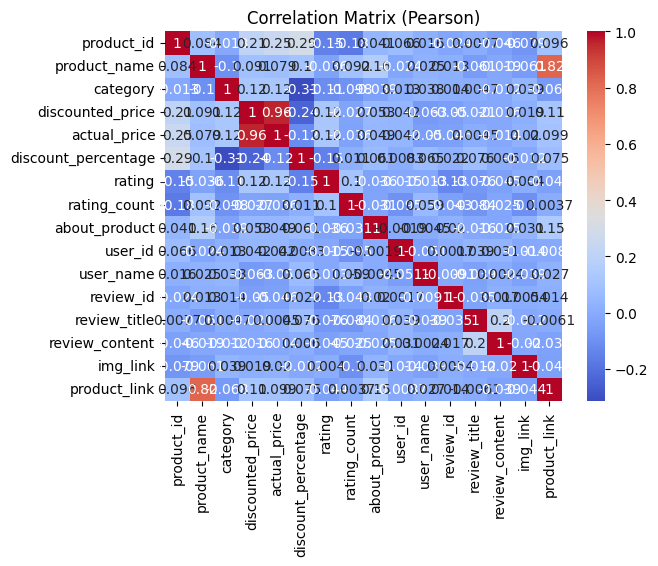

                     product_id  product_name  category  discounted_price  \
product_id             1.000000      0.083112 -0.013553          0.146237   
product_name           0.083112      1.000000 -0.106193          0.056597   
category              -0.013553     -0.106193  1.000000          0.360733   
discounted_price       0.146237      0.056597  0.360733          1.000000   
actual_price           0.269064      0.105719  0.277291          0.932787   
discount_percentage    0.271879      0.106467 -0.322090         -0.372991   
rating                -0.144268     -0.061395 -0.101758          0.079412   
rating_count          -0.406559      0.128565 -0.171893          0.122296   
about_product          0.041118      0.157675 -0.048319         -0.056144   
user_id                0.065228     -0.023810  0.015389          0.079048   
user_name              0.016859      0.024479  0.038735         -0.018599   
review_id             -0.024644      0.015269  0.016119         -0.048420   

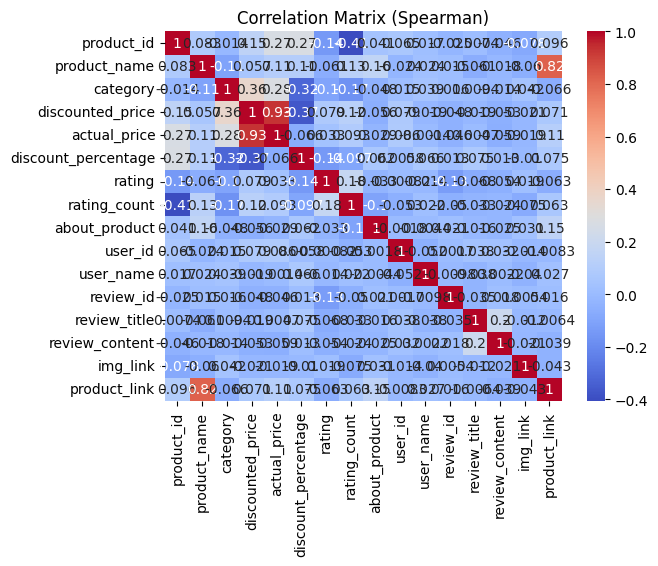

In [ ]:
# Calculate Pearson correlation coefficients (default in Pandas)
correlation_matrix = df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Pearson)")
plt.show()

# Calculate Spearman correlation coefficients (for non-linear relationships)
spearman_correlation_matrix = df.corr(method="spearman")

# Print the Spearman correlation matrix
print(spearman_correlation_matrix)

# Create a heatmap to visualize the Spearman correlations
sns.heatmap(spearman_correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Spearman)")
plt.show()

In [ ]:
# Calculate correlation coefficient between product price and sales
correlation_coefficient = np.corrcoef(df['actual_price'], df['rating'])[0, 1]

# Print correlation coefficient
print(correlation_coefficient)

0.1217444960999836


In [ ]:
# Calculate mean sales by product category
grouped_df = df.groupby('category')['rating'].mean()

# Print mean sales by product category
print(grouped_df)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64


In [ ]:
# Mean rating by category
mean_sales_by_category = df.groupby('category')['rating'].mean()
print(mean_sales_by_category)

# Median rating by review_content
median_sales_by_age = df.groupby('review_content')['rating'].median()
print(median_sales_by_age)

# Standard deviation of actual_price by product_name
std_price_by_brand = df.groupby('product_name')['actual_price'].std()
print(std_price_by_brand)

category
0      3.800000
1      4.150000
2      3.500000
3      3.600000
4      4.050000
         ...   
206    4.250000
207    4.150000
208    4.300000
209    4.133333
210    4.300000
Name: rating, Length: 211, dtype: float64
review_content
0       4.1
1       3.9
2       4.3
3       4.3
4       3.8
       ... 
1207    4.0
1208    4.3
1209    4.3
1210    4.5
1211    4.3
Name: rating, Length: 1212, dtype: float64
product_name
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
1332    NaN
1333    NaN
1334    NaN
1335    NaN
1336    0.0
Name: actual_price, Length: 1337, dtype: float64


In [ ]:
# Pivot table of rating by category and customer location
pivot_table = df.pivot_table(values='rating', index='category', columns='product_link', aggfunc='mean')
print(pivot_table)

# Pivot table of average rating_count by customer age group and product category
pivot_table = df.pivot_table(values='rating_count', index='review_content', columns='category', aggfunc='mean')
print(pivot_table)

product_link  0     1     2     3     4     5     6     7     8     9     \
category                                                                   
0              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
206            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
207            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
208            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
209            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
210            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

product_lin

In [ ]:
import scipy.stats as stats

# Conduct t-test to compare rating between two categories
t_statistic, p_value = stats.ttest_ind(df[df['category'] == 'electronics']['rating'], df[df['category'] == 'clothing']['rating'])

# Print t-statistic and p-value
print(t_statistic, p_value)

nan nan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   int64  
 1   product_name         1465 non-null   int64  
 2   category             1465 non-null   int64  
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   int64  
 9   user_id              1465 non-null   int64  
 10  user_name            1465 non-null   int64  
 11  review_id            1465 non-null   int64  
 12  review_title         1465 non-null   int64  
 13  review_content       1465 non-null   int64  
 14  img_link             1465 non-null   int64  
 15  product_link         1465 non-null   i

In [ ]:
# Chi-square test

# Create a contigency table
contigency_table = pd.crosstab(df['actual_price'], df['rating'])
contigency_table

rating,2.0,2.3,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.7,4.8,5.0
actual_price,,,,,,,,,,,,,,,,,,,,,,,,,
39.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
59.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
75.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
79.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74999.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
75990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
79990.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contigency_table)

# print the results
print('Chi-square statistic:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
print(f"Expected:\n {expected}")

Chi-square statistic: 8635.264277480239
p-value: 1.0
Degrees of freedom: 10752
Expected:
 [[0.00136519 0.00136519 0.00136519 ... 0.00819113 0.00409556 0.00409556]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 ...
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]
 [0.00068259 0.00068259 0.00068259 ... 0.00409556 0.00204778 0.00204778]]


In [ ]:
# inverse transform the data

df['product_id'] = le_product_id.inverse_transform(df['product_id'])
df['category'] = le_category.inverse_transform(df['category'])
df['review_id'] = le_review_id.inverse_transform(df['review_id'])
df['review_content'] = le_review_content.inverse_transform(df['review_content'])
df['product_name'] = le_product_name.inverse_transform(df['product_name'])
df['user_name'] = le_user_name.inverse_transform(df['user_name'])
df['about_product'] = le_about_product.inverse_transform(df['about_product'])
df['user_id'] = le_user_id.inverse_transform(df['user_id'])
df['review_title'] = le_review_title.inverse_transform(df['review_title'])
df['img_link'] = le_img_link.inverse_transform(df['img_link'])
df['product_link'] = le_product_link.inverse_transform(df['product_link'])